In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
TRAIN_IMAGES_PATH = '/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/train_images'
TEST_IMAGES_PATH = '/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/test_images'
METADATA_PATH = '/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/metadata'

In [3]:
BATCH_SIZE = 32

Text(0.5, 1.0, 'regular image')

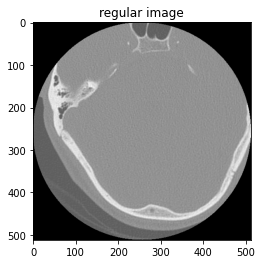

In [4]:
import pydicom as dicom
import cv2
from pydicom.pixel_data_handlers.util import apply_voi_lut
def load_dicom(path):
    """
    This supports loading both regular and compressed JPEG images. 
    See the first sell with `pip install` commands for the necessary dependencies
    """
    img=dicom.dcmread(path)
    img.PhotometricInterpretation = 'YBR_FULL'
    data = img.pixel_array
    data = data - np.min(data)
    if np.max(data) != 0:
        data = data / np.max(data)
    data=(data * 255).astype(np.uint8)
    return cv2.cvtColor(data, cv2.COLOR_GRAY2RGB), img

def load_dicom_arr(path):
    img=dicom.dcmread(path)
    img.PhotometricInterpretation = 'YBR_FULL'
    data = img.pixel_array
    data = data - np.min(data)
    if np.max(data) != 0:
        data = data / np.max(data)
    data=(data * 255).astype(np.uint8)
    image = cv2.cvtColor(data, cv2.COLOR_GRAY2RGB)
    image_arr = np.asarray(image, dtype='float64')/255
    return image_arr

# 1.2.826.0.1.3680043.10633-97
# 1.2.826.0.1.3680043.10633-373
im, meta = load_dicom(f'{TRAIN_IMAGES_PATH}/1.2.826.0.1.3680043.10001/1.dcm')
plt.figure()
plt.imshow(im)
plt.title('regular image')


In [5]:
import pandas as pd
df_seg = pd.read_csv(f'{METADATA_PATH}/meta_segmentation.csv')

In [6]:
slice_max_seg = df_seg.groupby('StudyInstanceUID')['Slice'].max().to_dict()
df_seg['SliceRatio'] = 0
df_seg['SliceRatio'] = df_seg['Slice'] / df_seg['StudyInstanceUID'].map(slice_max_seg)

In [7]:
df_seg.sample(10)

,StudyInstanceUID,Slice,ImageHeight,ImageWidth,SliceThickness,ImagePositionPatient_x,ImagePositionPatient_y,ImagePositionPatient_z,C1,C2,C3,C4,C5,C6,C7,SliceRatio
17773,1.2.826.0.1.3680043.27292,274,512,512,0.625,-71.000000,-49.700000,-174.375000,0,0,0,0,0,0,0,0.978571
9630,1.2.826.0.1.3680043.20928,26,512,512,1.000,-77.971100,-83.596190,-470.000000,1,0,0,0,0,0,0,0.104839
150,1.2.826.0.1.3680043.10633,151,512,512,1.000,-68.000000,98.000000,239.099976,1,1,0,0,0,0,0,0.351981
11554,1.2.826.0.1.3680043.23904,74,512,512,0.800,-108.882574,-285.103574,-1139.872000,0,0,0,0,0,0,0,0.176190
10134,1.2.826.0.1.3680043.21321,282,512,512,0.625,-97.669000,-54.331000,-131.178000,0,0,1,1,0,0,0,0.419019
17487,1.2.826.0.1.3680043.27016,274,512,512,0.625,-76.900000,-80.500000,-17.875000,0,0,0,0,0,0,0,0.958042
27964,1.2.826.0.1.3680043.6376,117,512,512,0.625,-80.000000,-46.100000,-51.690000,0,0,1,1,0,0,0,0.416370
8638,1.2.826.0.1.3680043.19388,124,512,512,0.600,-89.311523,-272.811523,168.300000,1,1,0,0,0,0,0,0.252033
18146,1.2.826.0.1.3680043.27752,367,512,512,0.500,-67.251200,-25.259020,-1254.900000,0,0,0,0,0,0,0,0.678373
20798,1.2.826.0.1.3680043.30640,152,512,512,0.625,-93.900000,-77.000000,88.625000,0,0,0,1,1,1,0,0.638655


In [8]:
# df_seg = df_seg.assign(Path = lambda x : TRAIN_IMAGES_PATH + '/' + str(x['StudyInstanceUID']) + '/' + str(x['Slice']) + '.dcm' )

In [9]:
targets = ['C1','C2','C3','C4','C5','C6','C7']
print(len(df_seg))

29832


In [10]:
# from tqdm import tqdm
# for (i, j, x) in zip(df_seg.StudyInstanceUID, df_seg.Slice, tqdm(df_seg.iterrows(), total=df_seg.shape[0])):
#     im, meta = load_dicom(f'{TRAIN_IMAGES_PATH}/{i}/{j}.dcm')
#     cv2.imwrite(f'/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/classification_training/{i}-{j}.png', im)
# print('done')
    

In [11]:
y = df_seg[targets].to_numpy()

In [12]:
# SEG_TRAIN_IMAGES_PATH = '/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/classification_training'
# df_seg['Array'] = ''
# df_seg.iloc[:, 16][0]

''

In [13]:
# from numpy import asarray
# from PIL import Image
# from tqdm import tqdm

# array = []

# for (i, j, x) in zip(df_seg.StudyInstanceUID, df_seg.Slice, tqdm(df_seg.iterrows(), total=df_seg.shape[0])):
#     img = Image.open(f'{SEG_TRAIN_IMAGES_PATH}/{i}-{j}.png')
#     numpydata = asarray(img)
#     array.append(numpydata)
# 
# arr = np.array(array)
# df_seg.sample(10)

In [14]:
# arr = np.array(array)

In [15]:
import torch
import torchvision as tv
from numpy import asarray

WEIGHTS = tv.models.efficientnet.EfficientNet_V2_S_Weights.DEFAULT

class VertebraeSegmentDataSet(torch.utils.data.Dataset):
    def __init__(self, df, path, transforms=None):
        super().__init__()
        self.df = df
        self.path = path
        self.transforms = transforms


    def __getitem__(self, i):
        path = os.path.join(self.path, self.df.iloc[i].StudyInstanceUID, f'{self.df.iloc[i].Slice}.dcm')
        try:
            img = load_dicom(path)[0]
            img =  asarray(img)  # Pytorch uses (batch, channel, height, width) order. Converting (height, width, channel) -> (channel, height, width)
            if self.transforms is not None:
                img = self.transforms(torch.as_tensor(img))
        except Exception as ex:
            print(ex)
            return None

        if 'C1' in self.df.columns:
            vert_targets = df_seg.iloc[i][['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].to_numpy()
            return img, vert_targets
        return img

    def __len__(self):
        return len(self.df)
    
ds_seg = VertebraeSegmentDataSet(df_seg, TRAIN_IMAGES_PATH)


In [16]:
# type(ds_seg)

__main__.VertebraeSegmentDataSet

In [17]:
X, y = ds_seg[100]
type(X)

numpy.ndarray

In [18]:
from tqdm import tqdm
list_X = []
list_y = []

for i in tqdm(range(len(df_seg))):
    X_v, y_v = ds_seg[i]
    list_X.append(X_v)
    list_y.append(y_v)

100%|██████████| 29832/29832 [06:16<00:00, 79.23it/s] 


In [19]:
X = np.array(list_X)
print('done')
y = np.array(list_y)
print('done')

done
done


In [20]:
# X = X.astype('float64')

In [21]:
# y = y.astype('float64')

In [ ]:
# with open('/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/numpy/X.npy', 'wb') as f:
np.savetxt('/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/numpy/X.out', X)

# with open('/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/numpy/y.npy', 'wb') as f:
np.savetxt('/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/numpy/y.out', y)

In [ ]:
y.shape

(29832, 7)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2)

: 

: 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory='/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/classification_training', target_size=(64,64), batch_size=29832)

In [5]:

unique_list = ['1.2.826.0.1.3680043.26990', '1.2.826.0.1.3680043.27016', '1.2.826.0.1.3680043.27292', '1.2.826.0.1.3680043.27752', '1.2.826.0.1.3680043.28025', '1.2.826.0.1.3680043.28327', '1.2.826.0.1.3680043.28665', '1.2.826.0.1.3680043.29425', '1.2.826.0.1.3680043.30067', '1.2.826.0.1.3680043.30487', '1.2.826.0.1.3680043.30524', '1.2.826.0.1.3680043.30565', '1.2.826.0.1.3680043.30640', '1.2.826.0.1.3680043.31077', '1.2.826.0.1.3680043.3168', '1.2.826.0.1.3680043.32071', '1.2.826.0.1.3680043.32280', '1.2.826.0.1.3680043.32370', '1.2.826.0.1.3680043.32434', '1.2.826.0.1.3680043.32436', '1.2.826.0.1.3680043.32590', '1.2.826.0.1.3680043.32658', '1.2.826.0.1.3680043.3376', '1.2.826.0.1.3680043.3882', '1.2.826.0.1.3680043.3992', '1.2.826.0.1.3680043.4202', '1.2.826.0.1.3680043.4769', '1.2.826.0.1.3680043.5002', '1.2.826.0.1.3680043.5671', '1.2.826.0.1.3680043.5782', '1.2.826.0.1.3680043.5783', '1.2.826.0.1.3680043.6078', '1.2.826.0.1.3680043.6125', '1.2.826.0.1.3680043.6376', '1.2.826.0.1.3680043.780', '1.2.826.0.1.3680043.8024', '1.2.826.0.1.3680043.8330', '1.2.826.0.1.3680043.8574', '1.2.826.0.1.3680043.8744', '1.2.826.0.1.3680043.8884', '1.2.826.0.1.3680043.9926']
unique_list.sort()
print(unique_list)

['1.2.826.0.1.3680043.26990', '1.2.826.0.1.3680043.27016', '1.2.826.0.1.3680043.27292', '1.2.826.0.1.3680043.27752', '1.2.826.0.1.3680043.28025', '1.2.826.0.1.3680043.28327', '1.2.826.0.1.3680043.28665', '1.2.826.0.1.3680043.29425', '1.2.826.0.1.3680043.30067', '1.2.826.0.1.3680043.30487', '1.2.826.0.1.3680043.30524', '1.2.826.0.1.3680043.30565', '1.2.826.0.1.3680043.30640', '1.2.826.0.1.3680043.31077', '1.2.826.0.1.3680043.3168', '1.2.826.0.1.3680043.32071', '1.2.826.0.1.3680043.32280', '1.2.826.0.1.3680043.32370', '1.2.826.0.1.3680043.32434', '1.2.826.0.1.3680043.32436', '1.2.826.0.1.3680043.32590', '1.2.826.0.1.3680043.32658', '1.2.826.0.1.3680043.3376', '1.2.826.0.1.3680043.3882', '1.2.826.0.1.3680043.3992', '1.2.826.0.1.3680043.4202', '1.2.826.0.1.3680043.4769', '1.2.826.0.1.3680043.5002', '1.2.826.0.1.3680043.5671', '1.2.826.0.1.3680043.5782', '1.2.826.0.1.3680043.5783', '1.2.826.0.1.3680043.6078', '1.2.826.0.1.3680043.6125', '1.2.826.0.1.3680043.6376', '1.2.826.0.1.3680043.780',

In [4]:

for i in unique_list:
    dir_path = "/Volumes/SSD/rsna-2022-cervical-spine-fracture-detection/train_images/" + str(i)   
    count = 0
    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            count += 1
    print(i,':', count)

1.2.826.0.1.3680043.26990 : 242
1.2.826.0.1.3680043.27016 : 285
1.2.826.0.1.3680043.27292 : 280
1.2.826.0.1.3680043.27752 : 541
1.2.826.0.1.3680043.28025 : 481
1.2.826.0.1.3680043.28327 : 287
1.2.826.0.1.3680043.28665 : 218
1.2.826.0.1.3680043.29425 : 296
1.2.826.0.1.3680043.30067 : 229
1.2.826.0.1.3680043.30487 : 348
1.2.826.0.1.3680043.30524 : 240
1.2.826.0.1.3680043.30565 : 227
1.2.826.0.1.3680043.30640 : 238
1.2.826.0.1.3680043.31077 : 672
1.2.826.0.1.3680043.3168 : 152
1.2.826.0.1.3680043.32071 : 263
1.2.826.0.1.3680043.32280 : 279
1.2.826.0.1.3680043.32370 : 262
1.2.826.0.1.3680043.32434 : 348
1.2.826.0.1.3680043.32436 : 271
1.2.826.0.1.3680043.32590 : 269
1.2.826.0.1.3680043.32658 : 334
1.2.826.0.1.3680043.3376 : 653
1.2.826.0.1.3680043.3882 : 241
1.2.826.0.1.3680043.3992 : 252
1.2.826.0.1.3680043.4202 : 273
1.2.826.0.1.3680043.4769 : 263
1.2.826.0.1.3680043.5002 : 399
1.2.826.0.1.3680043.5671 : 433
1.2.826.0.1.3680043.5782 : 569
1.2.826.0.1.3680043.5783 : 601
1.2.826.0.1.368004